In [ ]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 90.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 80.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 17.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 71.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.4 MB/s e

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
# from pycaret.classification import *

In [ ]:
data = pd.read_csv('Copy of phishing_dataset_full.csv')
data.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,0.0,892.0,0.0,0.0,0.0,0.0,0.0,1.0
1,5,0.0,1.0,3.0,0.0,3.0,0.0,2.0,0.0,0.0,...,1.0,2.0,1.0,9540.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,3.0,589.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,0.0,292.0,1.0,0.0,0.0,0.0,0.0,1.0
4,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,1.0,3597.0,0.0,1.0,0.0,0.0,0.0,0.0


#Data Cleaning

In [ ]:
# cek tipe data
data.dtypes

qty_dot_url              object
qty_hyphen_url          float64
qty_underline_url       float64
qty_slash_url           float64
qty_questionmark_url    float64
                         ...   
qty_redirects           float64
url_google_index        float64
domain_google_index     float64
url_shortened           float64
phishing                float64
Length: 112, dtype: object

In [ ]:
# cek null values
null_values_per_row = data.isnull().any(axis=1)


rows_with_null_values = data[null_values_per_row]
rows_with_null_values

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
6,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,2.0,291.0,0.0,0.0,0.0,0.0,0.0,0.0
13,"2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,21,2,0,0,0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,"1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13,1,0,0,0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,1.0,10.0,1.0,1.0,0.0,0.0,0.0,0.0
420,1,0.0,2.0,2.0,0.0,2.0,0.0,1.0,0.0,0.0,...,1.0,3.0,7.0,595.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
data.iterrows()

In [ ]:
# separate data yg failed masuk ke kolom yang sesuai
for index, row in data.iterrows():
    if ',' in str(row['qty_dot_url']):
        values = list(map(str, row['qty_dot_url'].split(',')))
        data.loc[index, 'qty_dot_url':'phishing'] = values

In [ ]:
data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Age': [25, 30, 35],
        'City': ['New York', 'San Francisco', 'Los Angeles']}
df = pd.DataFrame(data)

# Iterate over rows using iterrows()
for index, row in df.iterrows():
    print(f"Index: {index}")
    print(f"Row data:\n{row}\n")

Index: 0
Row data:
Name       Alice
Age           25
City    New York
Name: 0, dtype: object

Index: 1
Row data:
Name              Bob
Age                30
City    San Francisco
Name: 1, dtype: object

Index: 2
Row data:
Name        Charlie
Age              35
City    Los Angeles
Name: 2, dtype: object



In [ ]:
# cek strange string
null_column = data.columns[data.isna().any()]
null_column

Index(['qty_plus_domain', 'qty_asterisk_domain'], dtype='object')

In [ ]:
# navigate strange string position
data[['qty_plus_domain', 'qty_asterisk_domain']].isna().sum()

qty_plus_domain        1
qty_asterisk_domain    2
dtype: int64

In [ ]:
data.columns[data.isna().any()]

Index(['qty_plus_domain', 'qty_asterisk_domain'], dtype='object')

In [ ]:
# replace strange strings
data.replace('""', pd.NA, inplace=True)
data = data.apply(pd.to_numeric, errors='coerce').apply(lambda x: x.fillna(x.mean()))

data.replace('"no"',0, inplace=True)

In [ ]:
columns_to_convert = data.columns[:]
data[columns_to_convert] = data[columns_to_convert].astype(float)

In [ ]:
data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88647 entries, 0 to 88646
Data columns (total 112 columns):
 #    Column                      Non-Null Count  Dtype  
---   ------                      --------------  -----  
 0    qty_dot_url                 88647 non-null  float64
 1    qty_hyphen_url              88647 non-null  float64
 2    qty_underline_url           88647 non-null  float64
 3    qty_slash_url               88647 non-null  float64
 4    qty_questionmark_url        88647 non-null  float64
 5    qty_equal_url               88647 non-null  float64
 6    qty_at_url                  88647 non-null  float64
 7    qty_and_url                 88647 non-null  float64
 8    qty_exclamation_url         88647 non-null  float64
 9    qty_space_url               88647 non-null  float64
 10   qty_tilde_url               88647 non-null  float64
 11   qty_comma_url               88647 non-null  float64
 12   qty_plus_url                88647 non-null  float64
 13   qty_asterisk_u

In [ ]:
data['qty_dot_directory'].head()

0    1.0
1    3.0
2    0.0
3    2.0
4   -1.0
Name: qty_dot_directory, dtype: float64

In [ ]:
# replace -1 value into 0
data.replace(-1, 0, inplace=True)

#Data Visualization

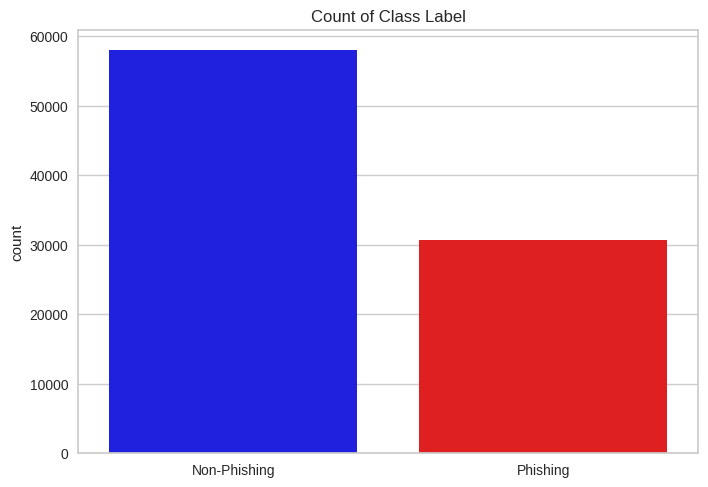

In [ ]:
# cek kelas data
sns.countplot(x='phishing', data=data, palette={0: 'blue', 1: 'red'})
plt.xlabel('')
plt.xticks(ticks=[0, 1], labels=['Non-Phishing', 'Phishing'])
plt.title('Count of Class Label')
plt.show()

#Data Preprocessing

In [ ]:
import pandas as pd

In [ ]:
data1 = {
    'A': [1, 2, 3],
    'B': [4, 5, 6]
}

data2 = {
    'A': [7, 8, 9],
    'B': ['10', '11', '12']
}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# Concatenating DataFrames
concatenated_df = pd.concat([df1, df2], axis=1)

print(concatenated_df)

   A  B  A   B
0  1  4  7  10
1  2  5  8  11
2  3  6  9  12


In [ ]:
# set data input dan target
x = data.drop('phishing', axis=1)
y = data['phishing']

In [ ]:
#Menghitung mutual information dari setiap features terhadap kolom target (phishing)
#Semaking tinggi Mutual Information maka semakin besar dependency target terhadap feature tersebut

mi_scores = mutual_info_classif(x, y)

feature_mi = pd.DataFrame({'Feature': x.columns, 'Mutual_Information': mi_scores})

feature_mi.sort_values(by='Mutual_Information', ascending=False)[:10]

,Feature,Mutual_Information
57,directory_length,0.380848
3,qty_slash_url,0.374908
43,qty_slash_directory,0.372845
18,length_url,0.280609
100,time_domain_activation,0.218597
99,asn_ip,0.168395
75,file_length,0.166175
40,qty_dot_directory,0.135977
58,qty_dot_file,0.122946
105,ttl_hostname,0.088291


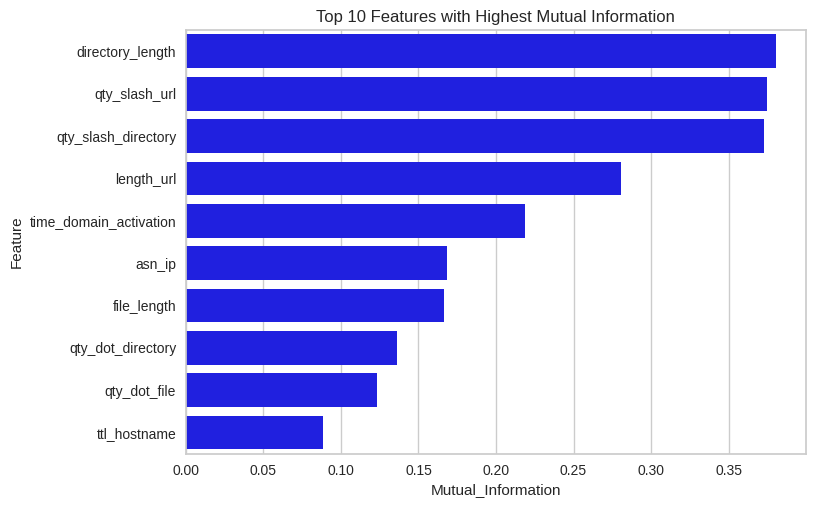

In [ ]:
# visualisasi top 10 feature berdasarkan nilai MI
top10_features = pd.DataFrame(feature_mi.sort_values(by='Mutual_Information', ascending=False).iloc[:10,0:2])

sns.barplot(x='Mutual_Information', y='Feature', data=top10_features, orient='h', color='blue')
plt.title('Top 10 Features with Highest Mutual Information')
plt.show()

In [ ]:
#Feature selection: memilih features dengan Mutual Information Score > 0.1

feature_mi.sort_values(by='Mutual_Information', ascending=False).iloc[:9,0].values

array(['directory_length', 'qty_slash_url', 'qty_slash_directory',
       'length_url', 'time_domain_activation', 'asn_ip', 'file_length',
       'qty_dot_directory', 'qty_dot_file'], dtype=object)

In [ ]:
data_fin = data[['directory_length', 'qty_slash_url', 'qty_slash_directory',
       'length_url', 'time_domain_activation', 'asn_ip', 'file_length',
       'qty_dot_directory', 'qty_dot_file','phishing']]

X = data_fin.drop('phishing', axis=1)
Y = data_fin['phishing']

In [ ]:
# split data dan scalling
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

scaler = MinMaxScaler()

columns_to_scaled = ['directory_length', 'qty_slash_url', 'qty_slash_directory',
       'length_url', 'time_domain_activation', 'asn_ip', 'file_length',
       'qty_dot_directory', 'qty_dot_file']

x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train[columns_to_scaled]), columns=columns_to_scaled)
x_test_scaled = pd.DataFrame(scaler.transform(x_test[columns_to_scaled]), columns=columns_to_scaled)

Menggunakan library pycaret untuk membuat beberapa model machine learning secara otomatis. Hal ini untuk melihat kemungkinan algoritma yang dapat memberikan hasil klasifikasi yang terbaik.

In [ ]:
setup(data=data, target='phishing')

best_model = compare_models()

,Description,Value
0,Session id,4751
1,Target,phishing
2,Target type,Binary
3,Original data shape,"(88647, 112)"
4,Transformed data shape,"(88647, 112)"
5,Transformed train set shape,"(62052, 112)"
6,Transformed test set shape,"(26595, 112)"
7,Numeric features,111
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9691,0.9947,0.9589,0.9520,0.9554,0.9318,0.9318,9.2510
xgboost,Extreme Gradient Boosting,0.9691,0.9946,0.9548,0.9559,0.9553,0.9318,0.9318,2.3310
et,Extra Trees Classifier,0.9681,0.9945,0.9555,0.9525,0.9540,0.9296,0.9296,11.9950
lightgbm,Light Gradient Boosting Machine,0.9665,0.9941,0.9527,0.9504,0.9516,0.9259,0.9259,5.5230
gbc,Gradient Boosting Classifier,0.9530,0.9892,0.9341,0.9303,0.9322,0.8963,0.8963,19.7330
dt,Decision Tree Classifier,0.9508,0.9459,0.9299,0.9280,0.9289,0.8913,0.8913,1.2110
ada,Ada Boost Classifier,0.9350,0.9839,0.9038,0.9079,0.9058,0.8563,0.8563,4.9560
lr,Logistic Regression,0.9121,0.9657,0.8357,0.9030,0.8680,0.8023,0.8037,11.7770
lda,Linear Discriminant Analysis,0.9080,0.9731,0.8019,0.9218,0.8577,0.7902,0.7944,2.3900
ridge,Ridge Classifier,0.9072,0.0000,0.7984,0.9229,0.8561,0.7882,0.7927,0.3930


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Dari hasil Pycaret di atas, dapat dilihat top 4 algoritma ada Random Forest, Extra Trees Classifier, XGBoost, dan LightGBM yang memberikan accuracy 0.96 dan F1 Score 0.95. Namun, dari 4 algoritma tersebut XGBoost memiliki training time yang paling cepat, yaitu 2.33 detik, maka kami memutuskan untuk menggunakan XGBoost dan membuat modelnya ulang untuk tuning hyperparameternya.

# Build XGBoost Model



In [ ]:
xgb = XGBClassifier()

param_grid = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [9, 10, 11, 12],
    'n_estimators': [250, 300, 350]
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     lea...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='binary:logistic', ...),
             n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.01],
                         'max_depth': [9, 10, 11, 12],
                         'n_estimators': [250, 300, 350]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [ ]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(best_params)

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300}


In [ ]:
# prediksi
y_pred = best_model.predict(x_test_scaled)

print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print('\n', classification_report(y_test, y_pred))

Accuracy score: 0.9591088550479413

               precision    recall  f1-score   support

         0.0       0.97      0.97      0.97     11583
         1.0       0.94      0.94      0.94      6147

    accuracy                           0.96     17730
   macro avg       0.95      0.96      0.95     17730
weighted avg       0.96      0.96      0.96     17730



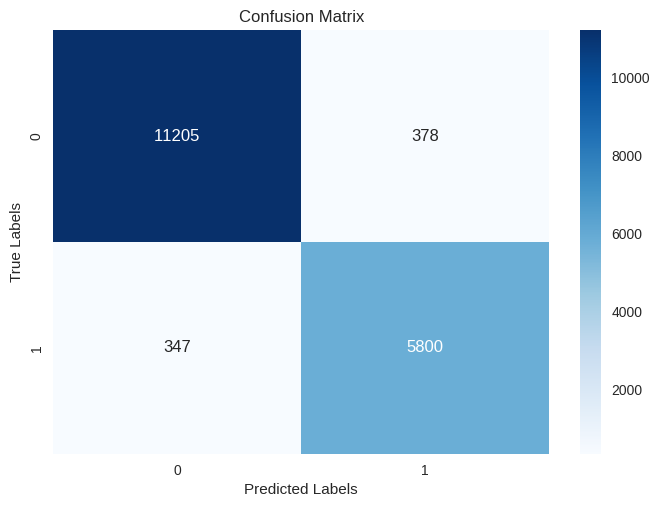

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
path = 'XGB_Model_Phishing.joblib'
joblib.dump(best_model, path)

In [ ]:
#Jika ingin menggunakan model yang sudah disave
#model = load('/content/XGB_Model_Phishing.joblib')